In [81]:
import numpy as np
import tifffile
from IPython.display import display
import PIL.Image

# helper functions
def convert_ar_float_to_uint8(ar, val_range=None):
    val_min, val_max = (None, None) if val_range is None else val_range
    ar_new = ar.astype(np.float)
    if val_min is not None:
        ar_new[ar_new < val_min] = val_min
    if val_max is not None:
        ar_new[ar_new > val_max] = val_max
    ar_new -= np.min(ar_new) if val_min is None else val_min
    ar_new /= np.max(ar_new) if val_max is None else (val_max - val_min)
    ar_new *= 256.0
    ar_new[ar_new >= 256.0] = 255.0
    return ar_new.astype(np.uint8)

def add_chunk_border(ar, slices, border=1):
    """Annotate ar with border around chunk specified by slices."""
    slices_smaller = []
    for s in slices:
        slices_smaller.append(slice(s.start + border, s.stop - border))
    mask = np.zeros(ar.shape, dtype=np.bool)
    mask[slices] = True
    mask[slices_smaller] = False
    ar[mask] = 255

### read in training image pair

z_sel: 3
signal range: -11.4597 14.0048
target range: -2.59061 23.3415


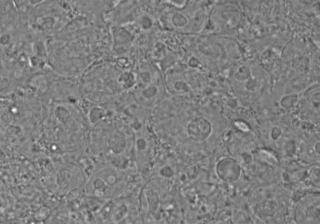

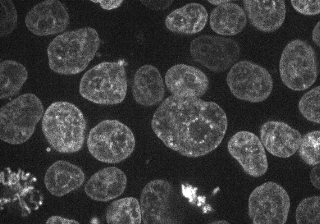

In [61]:
path_signal = '../saved_models/ttf_bf_dna_no_relu/outputs/img_train_01_signal.tif'
path_target = '../saved_models/ttf_bf_dna_no_relu/outputs/img_train_01_target.tif'
img_signal_vol = tifffile.imread(path_signal)
img_target_vol = tifffile.imread(path_target)

z_sel = np.argmax(np.mean(img_target_vol, axis=(1, 2)))
print('z_sel:', z_sel)
print('signal range:', np.min(img_signal_vol), np.max(img_signal_vol))
print('target range:', np.min(img_target_vol), np.max(img_target_vol))

val_range_signal = (-10, 10)
val_range_target = (-2, 10)
img_signal = convert_ar_float_to_uint8(img_signal_vol[z_sel, ], val_range_signal)
img_target = convert_ar_float_to_uint8(img_target_vol[z_sel, ], val_range_target)
display(PIL.Image.fromarray(img_signal))
display(PIL.Image.fromarray(img_target))


### get chunks

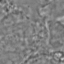

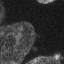

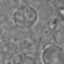

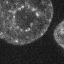

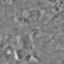

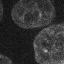

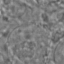

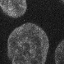

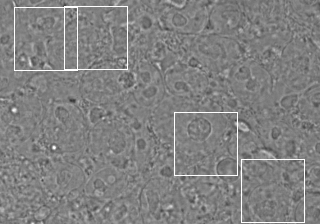

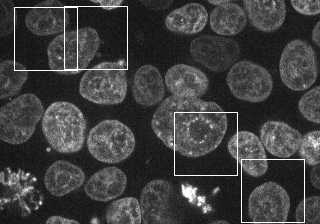

In [86]:
n_chunks = 4
shape_img = img_signal.shape
shape_chunk = (64, 64)
border = 1

chunk_coords = np.stack((
    np.random.randint(0, shape_img[0] - shape_chunk[0] + 1, size=n_chunks),
    np.random.randint(0, shape_img[1] - shape_chunk[1] + 1, size=n_chunks)
    ), axis=1)

img_signal_annotated = img_signal_slice.copy()
img_target_annotated = img_target_slice.copy()
for coord in chunk_coords:
    slices = (
        slice(coord[0], coord[0] + shape_chunk[0]),
        slice(coord[1], coord[1] + shape_chunk[1]),
    )
    img_signal_chunk = img_signal[slices]
    img_target_chunk = img_target[slices]
    display(PIL.Image.fromarray(img_signal_chunk))
    display(PIL.Image.fromarray(img_target_chunk))
    add_chunk_border(img_signal_annotated, slices, border)
    add_chunk_border(img_target_annotated, slices, border)
display(PIL.Image.fromarray(img_signal_annotated))
display(PIL.Image.fromarray(img_target_annotated))